# Load Libraries

In [13]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns


# Load Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Intermediate Machine Learning/Kmeans Clustering/cust_seg.csv')

df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.isnull().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [5]:
# Impute missing values in 'Defaulted' with the median
df['Defaulted'].fillna(df['Defaulted'].median(), inplace=True)

In [6]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Use KMeans to create various customer segments.


## Use an Elbow Plot of inertia.

Text(0, 0.5, 'inertia')

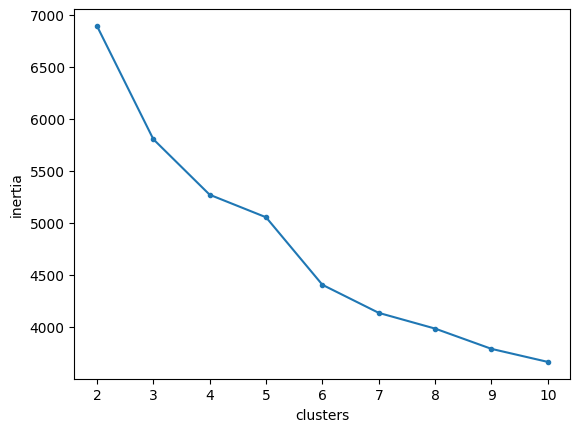

In [7]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state = 42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')



## And a plot of Silhouette Scores.

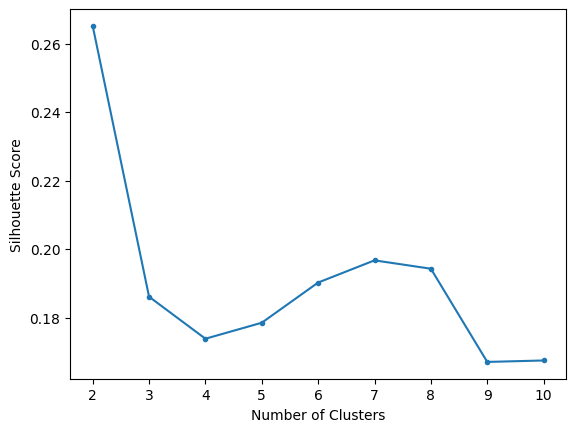

In [10]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
  kmeans.fit(df_scaled)
  silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');



We can see from the plot above that 2 would be the best number of clusters for our data since it has the highest Silhouette Score.

# Analyze the clusters you made in Part 1.

## Fit KMeans Model

In [11]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
kmeans.fit(df_scaled)
silhouette_score(df_scaled, kmeans.labels_)


0.26515614092308104

##  Visualize Clusters

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615:

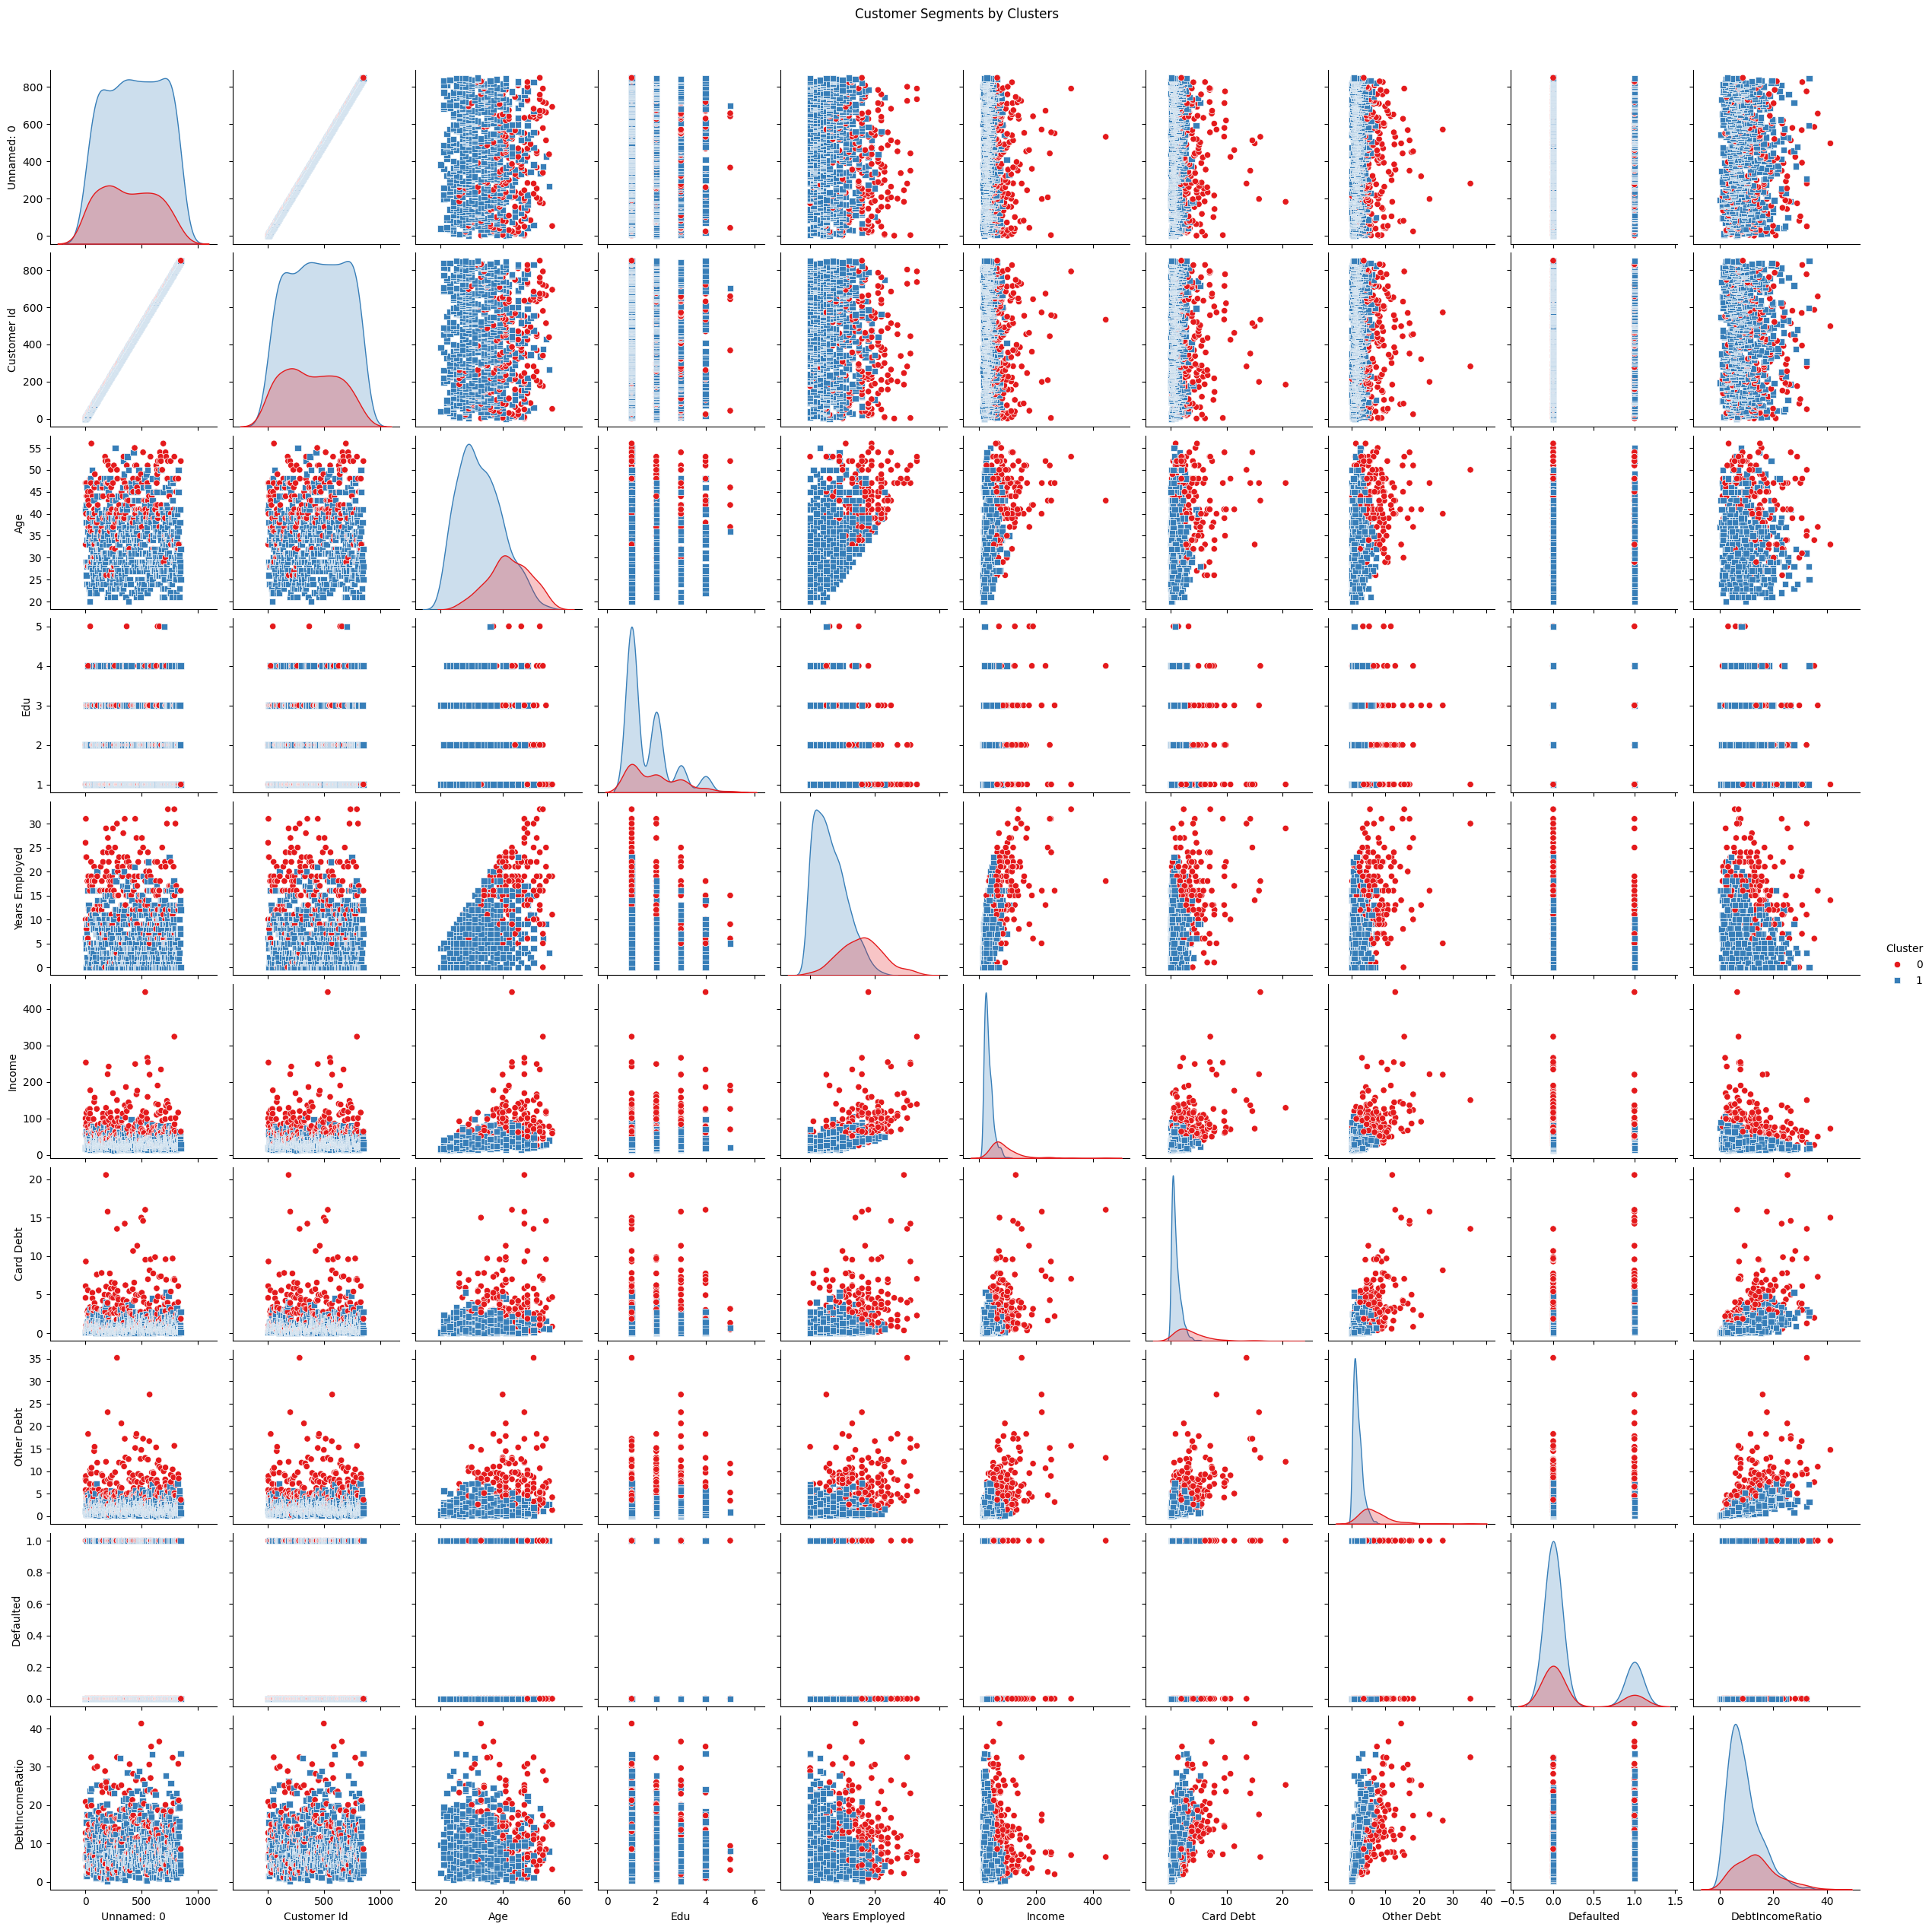

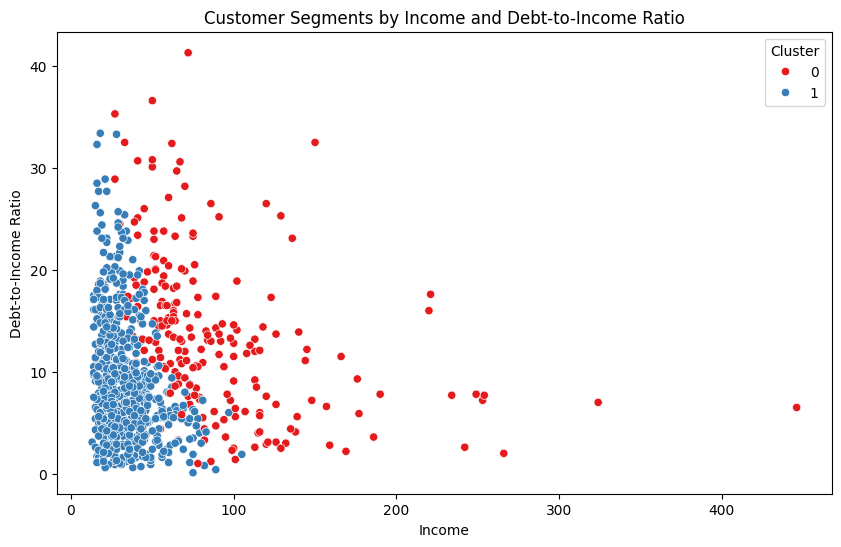

In [16]:
# # Fit kmeans model with 2 clusters and display the silhouette score
# kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
# kmeans.fit(df_scaled)
# df['Cluster'] = kmeans.labels_ # Add the cluster labels to the DataFrame
# silhouette_score(df_scaled, kmeans.labels_)

# Visualize clusters using a pairplot
sns.pairplot(df, hue='Cluster', palette='Set1', markers=["o", "s", "D"])
plt.suptitle('Customer Segments by Clusters', y=1.02)
plt.show()

# For more detailed visualization, you might want to visualize clusters on specific features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='DebtIncomeRatio', hue='Cluster', palette='Set1')
plt.title('Customer Segments by Income and Debt-to-Income Ratio')
plt.xlabel('Income')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

## Create Analytical Visualizations

<ipython-input-17-11f9db13bcce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=df, palette='Set1')
<ipython-input-17-11f9db13bcce>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=df, palette='Set1')


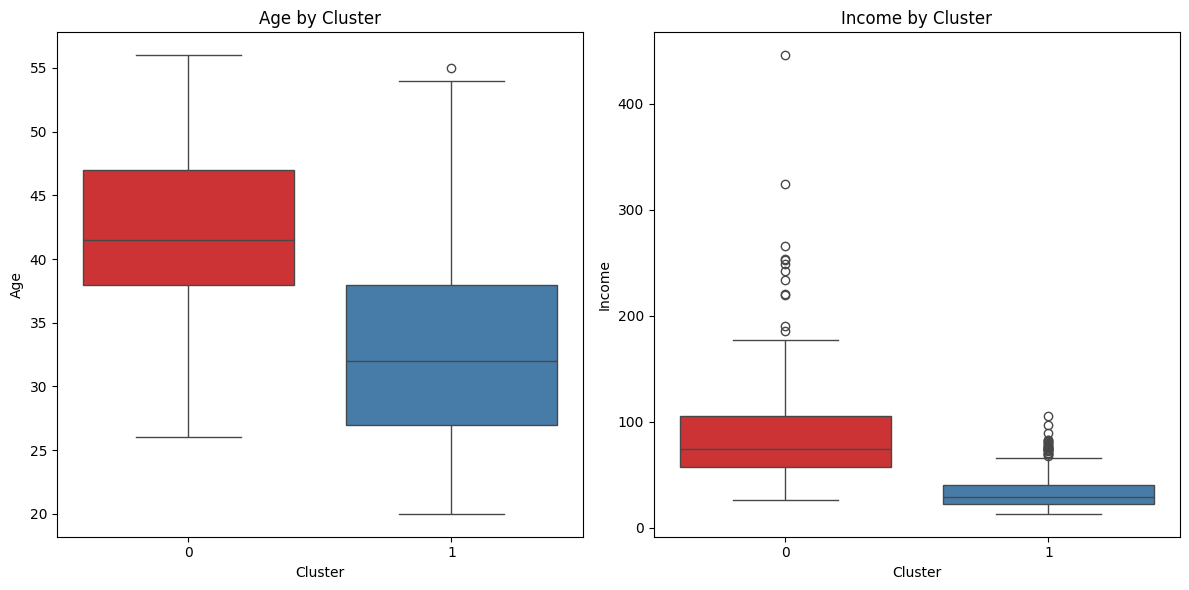

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Age', data=df, palette='Set1')
plt.title('Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Income', data=df, palette='Set1')
plt.title('Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')

plt.tight_layout()
plt.show()


## Debt-to-Income Ratio by Cluster


<ipython-input-18-f752dbf5f471>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='DebtIncomeRatio', data=df, palette='Set1')


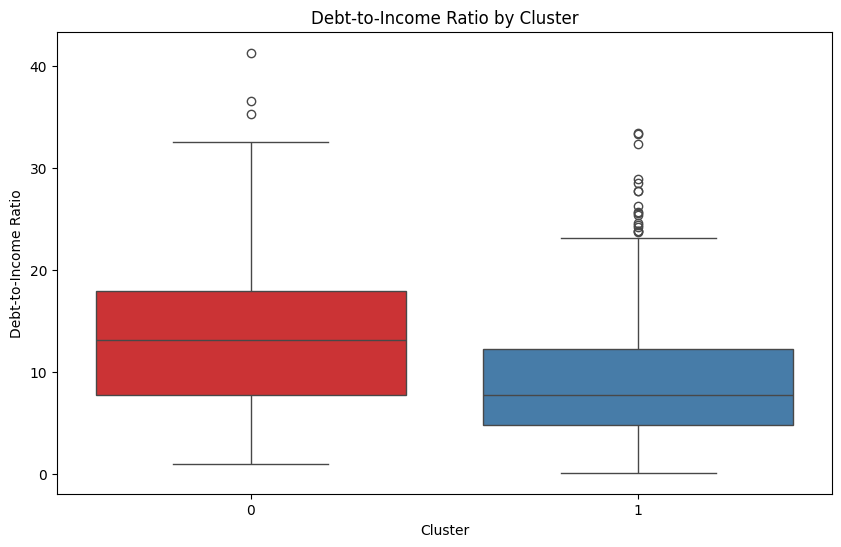

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='DebtIncomeRatio', data=df, palette='Set1')
plt.title('Debt-to-Income Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Debt-to-Income Ratio')
plt.show()


Cluster 1: "Low Usage and Low Balance"

Features:

Balance: Lowest average balance.
Purchase Frequency: Low frequency of purchases.
Cash Advance: Very low cash advance amounts.
Credit Limit: Low credit limit.
Payments: Low payments.
Description:

People: This cluster represents individuals who rarely use their credit cards. They maintain low balances and rarely make purchases or cash advances. Their low credit limits might indicate a conservative approach to credit usage or a limited credit history.
Insight: These users are not utilizing their credit potential. They might benefit from basic credit cards with no annual fees or low-interest rates, as they likely prioritize financial stability and minimal debt.

Cluster 2: "Moderate Usage with High Cash Advances"

Features:

Balance: Moderate average balance.
Purchase Frequency: Moderate frequency of purchases.
Cash Advance: Highest cash advance amounts.
Credit Limit: Moderate credit limit.
Payments: Moderate payments.
Description:

People: This cluster includes users who make frequent cash advances. They also make regular purchases and maintain a moderate balance. These individuals might use cash advances to manage short-term liquidity issues or other financial needs.
Insight: Users in this cluster might benefit from credit cards that offer lower fees or interest rates on cash advances. They may also benefit from financial products that help with cash flow management.

**Recommendations for the Credit Card Company**
  - **Cluster:** "High Usage and High Balance"

Marketing Strategy: Focus on premium credit cards that offer rewards for high spending, travel perks, and concierge services. Highlight benefits such as higher credit limits, exclusive access to events, and robust customer service.
Product Recommendation: Introduce or promote a premium rewards card with a high credit limit, extensive travel rewards, and cashback options for everyday spending.
  - Cluster 1: "Low Usage and Low Balance"

Marketing Strategy: Promote basic, no-annual-fee cards with low-interest rates. Emphasize simplicity, financial stability, and the opportunity to build credit.
Product Recommendation: Offer a low-interest or secured credit card designed for those looking to establish or rebuild their credit, with educational resources on responsible credit usage.
Cluster 2: "Moderate Usage with High Cash Advances"

Marketing Strategy: Target these users with cards that offer lower cash advance fees and interest rates. Provide financial tools and advice on managing cash flow.
Product Recommendation: Market a credit card with favorable terms for cash advances, perhaps combined with budgeting tools or a line of credit that caters to short-term financial needs.